In [41]:
import pandas as pd
import time
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import pairwise_distances_argmin
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import ward, dendrogram
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from pprint import pprint
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
%matplotlib inline

# 1. Read Data and Drop NA Values

In [3]:
clinical_patient = pd.read_csv('data_clinical_patient.txt', sep="\t")

In [4]:
clinical_patient = clinical_patient.dropna()
clinical_patient

,#Patient Identifier,Lymph nodes examined positive,Nottingham prognostic index,Cellularity,Chemotherapy,Cohort,ER status measured by IHC,HER2 status measured by SNP6,Hormone Therapy,Inferred Menopausal State,...,Age at Diagnosis,Overall Survival (Months),Overall Survival Status,Pam50 + Claudin-low subtype,3-Gene classifier subtype,Patient's Vital Status,Primary Tumor Laterality,Radio Therapy,Tumor Other Histologic Subtype,Type of Breast Surgery
0,#Identifier to uniquely specify a patient.,Number of lymphnodes positive,Nottingham prognostic index,Tumor Content,Chemotherapy.,Cohort.,ER status measured by IHC,HER2 status measured by SNP6,Hormone Therapy,Inferred Menopausal State,...,Age at Diagnosis,Overall survival in months since initial diago...,Overall patient survival status.,Pam50 + Claudin-low subtype,3-Gene classifier subtype,The survival state of the person.,"For tumors in paired organs, designates the si...",Radio Therapy,Text to describe a tumor's histologic subtype ...,Type of Breast Surgery
1,#STRING,STRING,NUMBER,STRING,STRING,STRING,STRING,STRING,STRING,STRING,...,NUMBER,NUMBER,STRING,STRING,STRING,STRING,STRING,STRING,STRING,STRING
2,#1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,PATIENT_ID,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,CHEMOTHERAPY,COHORT,ER_IHC,HER2_SNP6,HORMONE_THERAPY,INFERRED_MENOPAUSAL_STATE,...,AGE_AT_DIAGNOSIS,OS_MONTHS,OS_STATUS,CLAUDIN_SUBTYPE,THREEGENE,VITAL_STATUS,LATERALITY,RADIO_THERAPY,HISTOLOGICAL_SUBTYPE,BREAST_SURGERY
5,MB-0002,0,4.02,High,NO,1,Positive,NEUT,YES,Pre,...,43.19,84.63333333,LIVING,LumA,ER+/HER2- High Prolif,Living,Right,YES,Ductal/NST,BREAST CONSERVING
8,MB-0008,8,6.08,High,YES,1,Positive,NEUT,YES,Post,...,76.97,41.36666667,DECEASED,LumB,ER+/HER2- High Prolif,Died of Disease,Right,YES,Mixed,MASTECTOMY
9,MB-0010,0,4.062,Moderate,NO,1,Positive,NEUT,YES,Post,...,78.77,7.8,DECEASED,LumB,ER+/HER2- High Prolif,Died of Disease,Left,YES,Ductal/NST,MASTECTOMY
14,MB-0028,1,5.032,Moderate,NO,1,Positive,GAIN,YES,Post,...,86.41,36.56666667,DECEASED,LumB,ER+/HER2- High Prolif,Died of Other Causes,Right,YES,Ductal/NST,BREAST CONSERVING
15,MB-0035,0,3.056,High,NO,1,Negative,LOSS,NO,Post,...,84.22,36.26666667,DECEASED,Her2,ER+/HER2- High Prolif,Died of Disease,Left,NO,Lobular,MASTECTOMY
16,MB-0036,0,3.044,Moderate,NO,1,Positive,NEUT,YES,Post,...,85.49,132.0333333,DECEASED,LumA,ER+/HER2- Low Prolif,Died of Disease,Left,YES,Ductal/NST,MASTECTOMY


In [5]:
list(clinical_patient)

['#Patient Identifier',
 'Lymph nodes examined positive',
 'Nottingham prognostic index',
 'Cellularity',
 'Chemotherapy',
 'Cohort',
 'ER status measured by IHC',
 'HER2 status measured by SNP6',
 'Hormone Therapy',
 'Inferred Menopausal State',
 'Integrative Cluster',
 'Age at Diagnosis',
 'Overall Survival (Months)',
 'Overall Survival Status',
 'Pam50 + Claudin-low subtype',
 '3-Gene classifier subtype',
 "Patient's Vital Status",
 'Primary Tumor Laterality',
 'Radio Therapy',
 'Tumor Other Histologic Subtype',
 'Type of Breast Surgery']

In [6]:
RNA_Seq_expression_median = pd.read_csv('data_RNA_Seq_expression_median.txt', sep="\t")

In [7]:
RNA_Seq_expression_median = RNA_Seq_expression_median.dropna()
RNA_Seq_expression_median

,Hugo_Symbol,Entrez_Gene_Id,MB-0362,MB-0346,MB-0386,MB-0574,MB-0503,MB-0641,MB-0201,MB-0218,...,MB-6122,MB-6192,MB-4820,MB-5527,MB-5167,MB-5465,MB-5453,MB-5471,MB-5127,MB-4313
0,RERE,473.0,8.676978,9.653589,9.033589,8.814855,9.274265,9.286585,8.437347,8.569973,...,8.756024,8.804947,9.991215,9.595923,9.637249,8.131637,9.606915,9.049296,8.858622,8.415867
1,RNF165,494470.0,6.075331,6.687887,5.910885,5.628740,5.908698,6.206729,6.095592,6.383530,...,7.101087,5.601472,7.103160,6.418987,6.203370,9.101942,7.427494,6.850000,6.550450,6.831722
4,PHF7,51533.0,5.838270,5.600876,6.030718,5.849428,5.964661,5.783374,5.737572,5.923928,...,5.653481,5.922894,6.181493,5.992153,6.230316,5.644587,5.927409,6.117095,5.936371,7.408960
5,CIDEA,1149.0,6.397503,5.246319,10.111816,6.116868,7.828171,8.744149,5.480091,5.671577,...,6.221834,6.488136,5.612846,6.241160,5.560488,5.611189,5.927031,6.374305,5.963092,9.181768
6,PAPD4,167153.0,7.906217,8.267256,7.959291,9.206376,8.706646,8.518929,7.478413,8.410583,...,8.172465,8.534527,8.203819,8.813103,8.612911,7.798269,8.520545,8.499637,9.320207,6.804085
8,SLC17A3,10786.0,5.702379,5.521794,5.689533,5.439130,5.417484,5.629885,5.686286,5.770271,...,5.568213,5.618281,5.584475,5.569774,5.699378,5.597732,5.550549,5.497546,5.690297,5.730308
9,SDS,10993.0,6.930741,6.141689,6.529312,6.430102,6.684893,5.632753,5.866132,7.403098,...,6.771088,6.840830,5.653775,5.739464,6.329290,6.583524,5.841476,6.351428,7.280037,7.642485
10,ATP6V1C2,245973.0,5.332863,7.563477,5.482155,5.398675,5.266674,5.701353,6.403136,5.508144,...,5.696485,5.326794,5.523254,5.440972,5.157272,5.514106,5.832439,5.544773,5.171260,5.900949
11,F3,2152.0,5.275676,5.376381,5.463788,5.409761,5.490693,5.363266,6.341856,5.611314,...,7.777069,5.696549,5.913224,6.052916,5.338212,6.573131,7.180979,5.919886,5.937993,6.019427
12,FAM71C,196472.0,5.443896,5.319857,5.254294,5.512298,5.363378,5.191612,5.208379,5.651903,...,5.377397,5.466207,5.457865,5.390588,5.400732,5.367170,5.437498,5.374992,5.338428,5.097951


In [8]:
RNA_Seq_expression_median.loc[RNA_Seq_expression_median['Hugo_Symbol']=='RERE']['MB-0362']

0    8.676978
Name: MB-0362, dtype: float64

# 2. Predictor Feature Construction

In [9]:
# all the RNA expression values
df = RNA_Seq_expression_median[RNA_Seq_expression_median.columns[2:]]

In [10]:
list(df)[0]

'MB-0362'

In [11]:
# data of patients who have both clinical and RNA expression data
clinical_RNA = clinical_patient.loc[clinical_patient['#Patient Identifier'] == list(df)[0]]
for i in range(1,len(list(df))):
    #print (i)
    clinical_RNA = clinical_RNA.append(clinical_patient.loc[clinical_patient['#Patient Identifier'] == list(df)[i]])

In [12]:
clinical_RNA

,#Patient Identifier,Lymph nodes examined positive,Nottingham prognostic index,Cellularity,Chemotherapy,Cohort,ER status measured by IHC,HER2 status measured by SNP6,Hormone Therapy,Inferred Menopausal State,...,Age at Diagnosis,Overall Survival (Months),Overall Survival Status,Pam50 + Claudin-low subtype,3-Gene classifier subtype,Patient's Vital Status,Primary Tumor Laterality,Radio Therapy,Tumor Other Histologic Subtype,Type of Breast Surgery
254,MB-0362,1,4.036,High,YES,1,Positive,NEUT,YES,Post,...,52.79,47.03333333,DECEASED,LumA,ER+/HER2- High Prolif,Died of Disease,Left,YES,Ductal/NST,MASTECTOMY
240,MB-0346,5,6.032,High,NO,1,Negative,GAIN,NO,Pre,...,32.61,20.43333333,DECEASED,Her2,HER2+,Died of Disease,Left,NO,Ductal/NST,MASTECTOMY
277,MB-0386,8,6.03,Moderate,NO,1,Positive,LOSS,YES,Post,...,66.83,138.1333333,LIVING,LumA,ER+/HER2- Low Prolif,Living,Right,YES,Ductal/NST,BREAST CONSERVING
430,MB-0574,1,5.042,High,NO,1,Positive,NEUT,YES,Post,...,71.21,119.8,LIVING,LumA,ER+/HER2- High Prolif,Living,Right,YES,Ductal/NST,BREAST CONSERVING
377,MB-0503,0,3.046,High,NO,1,Positive,GAIN,YES,Post,...,60.77,101.2333333,LIVING,LumA,ER+/HER2- Low Prolif,Living,Left,YES,Ductal/NST,BREAST CONSERVING
489,MB-0641,1,4.028,Moderate,NO,1,Positive,NEUT,YES,Post,...,56.34,102.5666667,LIVING,claudin-low,ER+/HER2- Low Prolif,Living,Right,YES,Ductal/NST,BREAST CONSERVING
126,MB-0201,0,4.04,Moderate,YES,1,Negative,GAIN,NO,Pre,...,49.5,125.7,LIVING,Basal,HER2+,Living,Left,YES,Ductal/NST,MASTECTOMY
138,MB-0218,2,5.04,High,YES,1,Positive,NEUT,YES,Pre,...,43.39,131.0666667,LIVING,LumB,ER+/HER2- High Prolif,Living,Left,YES,Ductal/NST,BREAST CONSERVING
218,MB-0316,0,4.06,High,NO,1,Negative,NEUT,NO,Post,...,50.82,182.9,LIVING,Basal,ER-/HER2-,Living,Left,YES,Ductal/NST,BREAST CONSERVING
116,MB-0189,6,6.096,Moderate,YES,1,Positive,NEUT,YES,Post,...,57.79,9.066666667,DECEASED,Normal,ER+/HER2- Low Prolif,Died of Disease,Right,YES,Ductal/NST,MASTECTOMY


In [13]:
clinical_RNA_mod = clinical_RNA
clinical_RNA_mod['Overall Survival Status'] = clinical_RNA['Overall Survival Status'].replace('DECEASED',0)
clinical_RNA_mod['Overall Survival Status'] = clinical_RNA['Overall Survival Status'].replace('LIVING',1)

In [14]:
df

,MB-0362,MB-0346,MB-0386,MB-0574,MB-0503,MB-0641,MB-0201,MB-0218,MB-0316,MB-0189,...,MB-6122,MB-6192,MB-4820,MB-5527,MB-5167,MB-5465,MB-5453,MB-5471,MB-5127,MB-4313
0,8.676978,9.653589,9.033589,8.814855,9.274265,9.286585,8.437347,8.569973,8.892102,8.922748,...,8.756024,8.804947,9.991215,9.595923,9.637249,8.131637,9.606915,9.049296,8.858622,8.415867
1,6.075331,6.687887,5.910885,5.628740,5.908698,6.206729,6.095592,6.383530,5.773691,6.461321,...,7.101087,5.601472,7.103160,6.418987,6.203370,9.101942,7.427494,6.850000,6.550450,6.831722
4,5.838270,5.600876,6.030718,5.849428,5.964661,5.783374,5.737572,5.923928,5.902223,5.536764,...,5.653481,5.922894,6.181493,5.992153,6.230316,5.644587,5.927409,6.117095,5.936371,7.408960
5,6.397503,5.246319,10.111816,6.116868,7.828171,8.744149,5.480091,5.671577,5.509498,7.196945,...,6.221834,6.488136,5.612846,6.241160,5.560488,5.611189,5.927031,6.374305,5.963092,9.181768
6,7.906217,8.267256,7.959291,9.206376,8.706646,8.518929,7.478413,8.410583,7.779545,8.385897,...,8.172465,8.534527,8.203819,8.813103,8.612911,7.798269,8.520545,8.499637,9.320207,6.804085
8,5.702379,5.521794,5.689533,5.439130,5.417484,5.629885,5.686286,5.770271,5.510622,5.594352,...,5.568213,5.618281,5.584475,5.569774,5.699378,5.597732,5.550549,5.497546,5.690297,5.730308
9,6.930741,6.141689,6.529312,6.430102,6.684893,5.632753,5.866132,7.403098,6.881749,6.484873,...,6.771088,6.840830,5.653775,5.739464,6.329290,6.583524,5.841476,6.351428,7.280037,7.642485
10,5.332863,7.563477,5.482155,5.398675,5.266674,5.701353,6.403136,5.508144,5.709038,5.395278,...,5.696485,5.326794,5.523254,5.440972,5.157272,5.514106,5.832439,5.544773,5.171260,5.900949
11,5.275676,5.376381,5.463788,5.409761,5.490693,5.363266,6.341856,5.611314,5.906922,6.755304,...,7.777069,5.696549,5.913224,6.052916,5.338212,6.573131,7.180979,5.919886,5.937993,6.019427
12,5.443896,5.319857,5.254294,5.512298,5.363378,5.191612,5.208379,5.651903,5.452135,5.357860,...,5.377397,5.466207,5.457865,5.390588,5.400732,5.367170,5.437498,5.374992,5.338428,5.097951


In [15]:
RNA = []
for i in range(len(list(clinical_RNA["#Patient Identifier"]))):
    RNA.append(list(df[list(clinical_RNA["#Patient Identifier"])[i]]))

In [16]:
RNA_survival = []
for i in range(len(list(clinical_RNA["#Patient Identifier"]))):
    RNA_survival.append(list(clinical_RNA["Overall Survival Status"])[i])

In [17]:
RNA_df = pd.DataFrame(RNA,columns=RNA_Seq_expression_median['Hugo_Symbol'])

In [18]:
RNA_df

Hugo_Symbol,RERE,RNF165,PHF7,CIDEA,PAPD4,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,...,TBC1D4,ANGPTL2,ENOX1,LOC283104,VN1R4,UGCGL1,VPS72,CSMD3,CC2D1A,IGSF9
0,8.676978,6.075331,5.838270,6.397503,7.906217,5.702379,6.930741,5.332863,5.275676,5.443896,...,6.108972,9.144958,5.548618,5.335488,5.309543,7.688492,8.084979,5.161796,6.353215,7.304643
1,9.653589,6.687887,5.600876,5.246319,8.267256,5.521794,6.141689,7.563477,5.376381,5.319857,...,6.708027,7.387434,5.451468,5.471839,5.579198,7.804165,8.349115,5.197392,6.132355,7.933324
2,9.033589,5.910885,6.030718,10.111816,7.959291,5.689533,6.529312,5.482155,5.463788,5.254294,...,6.977441,9.030003,5.762705,5.322604,5.484665,7.934309,8.406332,8.087722,6.366335,7.580336
3,8.814855,5.628740,5.849428,6.116868,9.206376,5.439130,6.430102,5.398675,5.409761,5.512298,...,6.999086,7.219965,5.792747,5.520733,5.419803,7.744562,8.310019,5.780062,6.424048,6.903654
4,9.274265,5.908698,5.964661,7.828171,8.706646,5.417484,6.684893,5.266674,5.490693,5.363378,...,6.283907,8.751008,5.396735,5.492591,5.324644,7.701394,8.137014,5.498185,6.214301,6.839417
5,9.286585,6.206729,5.783374,8.744149,8.518929,5.629885,5.632753,5.701353,5.363266,5.191612,...,7.053220,10.331003,5.309029,5.407281,5.465429,7.690236,8.009209,5.408243,6.175542,6.326814
6,8.437347,6.095592,5.737572,5.480091,7.478413,5.686286,5.866132,6.403136,6.341856,5.208379,...,6.330388,9.494284,5.531613,5.667246,5.434942,7.837494,8.818098,5.291289,6.003532,8.375567
7,8.569973,6.383530,5.923928,5.671577,8.410583,5.770271,7.403098,5.508144,5.611314,5.651903,...,5.990080,9.330788,5.398512,5.568928,5.359962,7.360295,7.969567,5.104648,6.501156,6.534520
8,8.892102,5.773691,5.902223,5.509498,7.779545,5.510622,6.881749,5.709038,5.906922,5.452135,...,6.924801,8.217749,5.347958,5.570199,5.513456,7.679597,8.721196,5.218413,6.617991,7.143399
9,8.922748,6.461321,5.536764,7.196945,8.385897,5.594352,6.484873,5.395278,6.755304,5.357860,...,6.874854,9.514895,5.466573,5.433306,5.405663,8.096537,8.073800,5.220937,6.262962,7.149541


# 3. Genetic Expression Clustering
## 3.1 k-means

In [26]:
# NORMALIZATION
# standardise the means to 0 and standard error to 1
RNA = preprocessing.scale(RNA)

In [27]:
# TRAIN-TEST SPLIT
train_feature, test_feature = train_test_split(RNA, random_state=123, test_size=0.2)

print (len(train_feature))
print (len(test_feature))

1215
304


In [28]:
clusters=range(1,10)
# to store average distance values for each cluster from 1-9
meandist=[]

# k-means cluster analysis for 9 clusters
for k in clusters:
    # prepare the model
    model=KMeans(n_clusters=k)
    # fit the model
    model.fit(train_feature)
    # test the model
    clusassign=model.predict(train_feature)
    # gives average distance values for each cluster solution
    # cdist calculates distance of each two points from centriod
    # get the min distance (where point is placed in clsuter)
    # get average distance by summing & dividing by total number of samples
    meandist.append(sum(np.min(cdist(train_feature, model.cluster_centers_, 'euclidean'), axis=1))
    / len(train_feature))

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

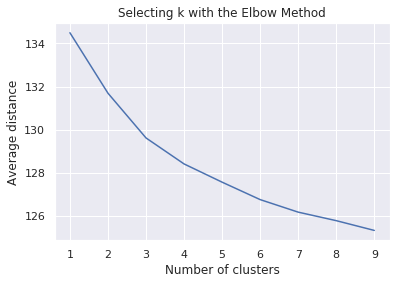

In [29]:
"""Plot average distance from observations from the cluster centroid
to use the Elbow Method to identify number of clusters to choose"""

plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')

# look a bend in the elbow that kind of shows where
# the average distance value might be leveling off such that adding more clusters
# doesn't decrease the average distance as much

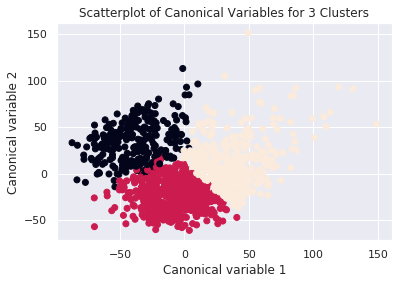

In [30]:
# VIEW CLUSTER USING PCA
# Interpret 3 cluster solution
model3=KMeans(n_clusters=3)
model3.fit(train_feature)
clusassign=model3.predict(train_feature)
# plot clusters

# Use Canonical Discriminate Analysis to reduce the dimensions (into 2)
# Creates a smaller no. of variables, with canonical variables ordered by proportion of variable accounted
# i.e., 1st canonical variable is most importance & so on

pca_2 = PCA(2) #return first two canonical variables
plot_columns = pca_2.fit_transform(train_feature)
# plot 1st canonical v in x axis, 2nd variable on y axis
# color code variables based on cluster assignments (i.e., predicted targets)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show()

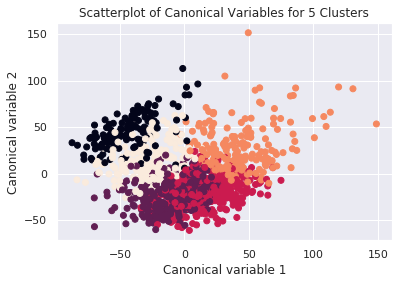

In [31]:
# Interpret 5 cluster solution
model5=KMeans(n_clusters=5)
model5.fit(train_feature)
clusassign=model5.predict(train_feature)
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(train_feature)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model5.labels_)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 5 Clusters')
plt.show()

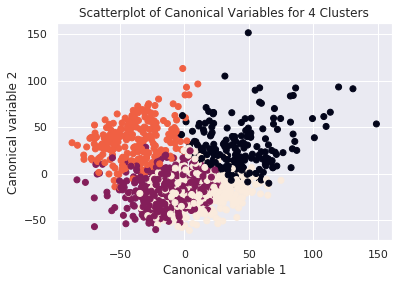

In [32]:
# Interpret 4 cluster solution
model4=KMeans(n_clusters=4)
model4.fit(train_feature)
clusassign=model4.predict(train_feature)

pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(train_feature)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model4.labels_)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 4 Clusters')
plt.show()

In [33]:
model4.cluster_centers_.shape

(4, 18484)

In [34]:
centers = model4.cluster_centers_
print(centers)

[[ 0.53306779  0.36744779  0.54681112 ...  0.04889651  0.46307474
   0.18844843]
 [ 0.10150432 -0.06802194 -0.12543568 ... -0.06885669 -0.2961201
  -0.21341089]
 [-0.60071877  0.15256935 -0.70753389 ... -0.20342934 -0.04060659
   0.24832769]
 [-0.06509522 -0.25415835  0.2475228  ...  0.17898869  0.12058472
  -0.0852381 ]]


In [35]:
model4.labels_

array([3, 2, 2, ..., 1, 0, 3], dtype=int32)

## 3.2 Agglomerative Clustering

In [60]:
cls = AgglomerativeClustering(n_clusters = 4)
cls_assignment = cls.fit_predict(train_feature)

NameError: name 'train_feature' is not defined

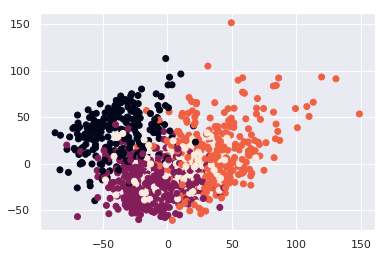

In [37]:
pca_2 = PCA(2) #return first two canonical variables
plot_columns = pca_2.fit_transform(train_feature)
# plot 1st canonical v in x axis, 2nd variable on y axis
# color code variables based on cluster assignments (i.e., predicted targets)
plt.scatter(plot_columns[:,0],plot_columns[:,1], c=cls_assignment) 

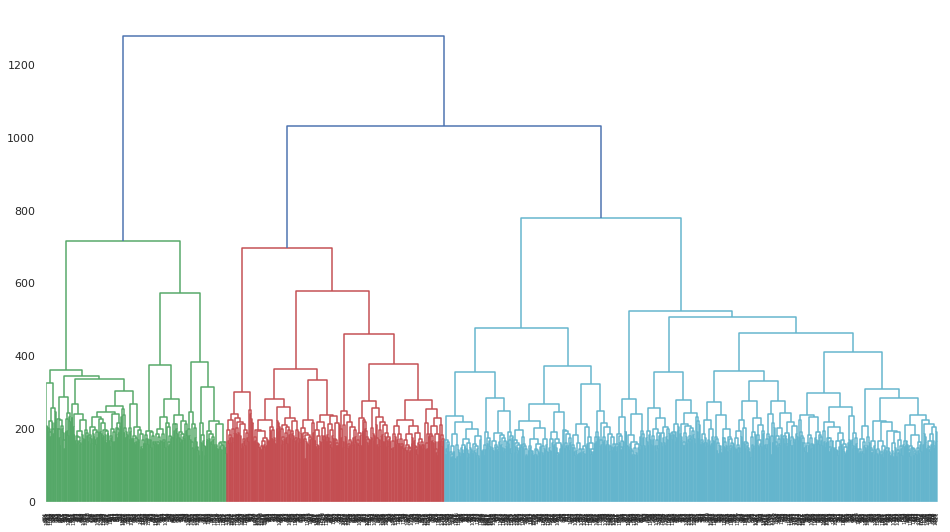

In [38]:
plt.figure(figsize = (16,9))
dendrogram(ward(train_feature))
plt.show()

# 4. Feature Preparation for Supervised Learning

In [19]:
list(clinical_RNA)

['#Patient Identifier',
 'Lymph nodes examined positive',
 'Nottingham prognostic index',
 'Cellularity',
 'Chemotherapy',
 'Cohort',
 'ER status measured by IHC',
 'HER2 status measured by SNP6',
 'Hormone Therapy',
 'Inferred Menopausal State',
 'Integrative Cluster',
 'Age at Diagnosis',
 'Overall Survival (Months)',
 'Overall Survival Status',
 'Pam50 + Claudin-low subtype',
 '3-Gene classifier subtype',
 "Patient's Vital Status",
 'Primary Tumor Laterality',
 'Radio Therapy',
 'Tumor Other Histologic Subtype',
 'Type of Breast Surgery']

In [20]:
clinical_RNA.head()

,#Patient Identifier,Lymph nodes examined positive,Nottingham prognostic index,Cellularity,Chemotherapy,Cohort,ER status measured by IHC,HER2 status measured by SNP6,Hormone Therapy,Inferred Menopausal State,...,Age at Diagnosis,Overall Survival (Months),Overall Survival Status,Pam50 + Claudin-low subtype,3-Gene classifier subtype,Patient's Vital Status,Primary Tumor Laterality,Radio Therapy,Tumor Other Histologic Subtype,Type of Breast Surgery
254,MB-0362,1,4.036,High,YES,1,Positive,NEUT,YES,Post,...,52.79,47.03333333,0,LumA,ER+/HER2- High Prolif,Died of Disease,Left,YES,Ductal/NST,MASTECTOMY
240,MB-0346,5,6.032,High,NO,1,Negative,GAIN,NO,Pre,...,32.61,20.43333333,0,Her2,HER2+,Died of Disease,Left,NO,Ductal/NST,MASTECTOMY
277,MB-0386,8,6.03,Moderate,NO,1,Positive,LOSS,YES,Post,...,66.83,138.1333333,1,LumA,ER+/HER2- Low Prolif,Living,Right,YES,Ductal/NST,BREAST CONSERVING
430,MB-0574,1,5.042,High,NO,1,Positive,NEUT,YES,Post,...,71.21,119.8,1,LumA,ER+/HER2- High Prolif,Living,Right,YES,Ductal/NST,BREAST CONSERVING
377,MB-0503,0,3.046,High,NO,1,Positive,GAIN,YES,Post,...,60.77,101.2333333,1,LumA,ER+/HER2- Low Prolif,Living,Left,YES,Ductal/NST,BREAST CONSERVING


In [21]:
features = clinical_RNA[['#Patient Identifier',
 'Lymph nodes examined positive',
 'Nottingham prognostic index',
 'Cellularity',
 'Chemotherapy',
 'Cohort',
 'ER status measured by IHC',
 'HER2 status measured by SNP6',
 'Hormone Therapy',
 'Inferred Menopausal State',
 'Integrative Cluster',
 'Age at Diagnosis',
 'Pam50 + Claudin-low subtype',
 '3-Gene classifier subtype',
 'Primary Tumor Laterality',
 'Radio Therapy',
 'Tumor Other Histologic Subtype',
 'Type of Breast Surgery']]

In [22]:
features.head()

,#Patient Identifier,Lymph nodes examined positive,Nottingham prognostic index,Cellularity,Chemotherapy,Cohort,ER status measured by IHC,HER2 status measured by SNP6,Hormone Therapy,Inferred Menopausal State,Integrative Cluster,Age at Diagnosis,Pam50 + Claudin-low subtype,3-Gene classifier subtype,Primary Tumor Laterality,Radio Therapy,Tumor Other Histologic Subtype,Type of Breast Surgery
254,MB-0362,1,4.036,High,YES,1,Positive,NEUT,YES,Post,2,52.79,LumA,ER+/HER2- High Prolif,Left,YES,Ductal/NST,MASTECTOMY
240,MB-0346,5,6.032,High,NO,1,Negative,GAIN,NO,Pre,5,32.61,Her2,HER2+,Left,NO,Ductal/NST,MASTECTOMY
277,MB-0386,8,6.03,Moderate,NO,1,Positive,LOSS,YES,Post,9,66.83,LumA,ER+/HER2- Low Prolif,Right,YES,Ductal/NST,BREAST CONSERVING
430,MB-0574,1,5.042,High,NO,1,Positive,NEUT,YES,Post,2,71.21,LumA,ER+/HER2- High Prolif,Right,YES,Ductal/NST,BREAST CONSERVING
377,MB-0503,0,3.046,High,NO,1,Positive,GAIN,YES,Post,7,60.77,LumA,ER+/HER2- Low Prolif,Left,YES,Ductal/NST,BREAST CONSERVING


In [23]:
features_mod = features
features_mod['Cellularity'] = features['Cellularity'].replace('High',1)
features_mod['Cellularity'] = features['Cellularity'].replace('Low',-1)
features_mod['Cellularity'] = features['Cellularity'].replace('Moderate',0)
features_mod['Chemotherapy'] = features['Chemotherapy'].replace('YES',1)
features_mod['Chemotherapy'] = features['Chemotherapy'].replace('NO',0)
features_mod['ER status measured by IHC'] = features['ER status measured by IHC'].replace('Positive',1)
features_mod['ER status measured by IHC'] = features['ER status measured by IHC'].replace('Negative',0)
features_mod['HER2 status measured by SNP6'] = features['HER2 status measured by SNP6'].replace('NEUT',0)
features_mod['HER2 status measured by SNP6'] = features['HER2 status measured by SNP6'].replace('GAIN',1)
features_mod['HER2 status measured by SNP6'] = features['HER2 status measured by SNP6'].replace('LOSS',-1)
features_mod['Hormone Therapy'] = features['Hormone Therapy'].replace('NO',0)
features_mod['Hormone Therapy'] = features['Hormone Therapy'].replace('YES',1)
features_mod['Inferred Menopausal State'] = features['Inferred Menopausal State'].replace('Post',1)
features_mod['Inferred Menopausal State'] = features['Inferred Menopausal State'].replace('Pre',0)
features_mod['Pam50 + Claudin-low subtype'] = features['Pam50 + Claudin-low subtype'].replace('Basal',0)
features_mod['Pam50 + Claudin-low subtype'] = features['Pam50 + Claudin-low subtype'].replace('Her2',1)
features_mod['Pam50 + Claudin-low subtype'] = features['Pam50 + Claudin-low subtype'].replace('LumA',2)
features_mod['Pam50 + Claudin-low subtype'] = features['Pam50 + Claudin-low subtype'].replace('LumB',3)
features_mod['Pam50 + Claudin-low subtype'] = features['Pam50 + Claudin-low subtype'].replace('NC',4)
features_mod['Pam50 + Claudin-low subtype'] = features['Pam50 + Claudin-low subtype'].replace('Normal',5)
features_mod['Pam50 + Claudin-low subtype'] = features['Pam50 + Claudin-low subtype'].replace('claudin-low',6)
features_mod['3-Gene classifier subtype'] = features['3-Gene classifier subtype'].replace('ER+/HER2- High Prolif',0)
features_mod['3-Gene classifier subtype'] = features['3-Gene classifier subtype'].replace('ER+/HER2- Low Prolif',1)
features_mod['3-Gene classifier subtype'] = features['3-Gene classifier subtype'].replace('ER-/HER2-',2)
features_mod['3-Gene classifier subtype'] = features['3-Gene classifier subtype'].replace('HER2+',3)
features_mod['Primary Tumor Laterality'] = features['Primary Tumor Laterality'].replace('Left',1)
features_mod['Primary Tumor Laterality'] = features['Primary Tumor Laterality'].replace('Right',0)
features_mod['Radio Therapy'] = features['Radio Therapy'].replace('YES',1)
features_mod['Radio Therapy'] = features['Radio Therapy'].replace('NO',0)
features_mod['Tumor Other Histologic Subtype'] = features['Tumor Other Histologic Subtype'].replace('Ductal/NST',0)
features_mod['Tumor Other Histologic Subtype'] = features['Tumor Other Histologic Subtype'].replace('Lobular',1)
features_mod['Tumor Other Histologic Subtype'] = features['Tumor Other Histologic Subtype'].replace('Medullary',2)
features_mod['Tumor Other Histologic Subtype'] = features['Tumor Other Histologic Subtype'].replace('Mixed',3)
features_mod['Tumor Other Histologic Subtype'] = features['Tumor Other Histologic Subtype'].replace('Mucinous',4)
features_mod['Tumor Other Histologic Subtype'] = features['Tumor Other Histologic Subtype'].replace('Other',5)
features_mod['Tumor Other Histologic Subtype'] = features['Tumor Other Histologic Subtype'].replace('Tubular/ cribriform',6)
features_mod['Type of Breast Surgery'] = features['Type of Breast Surgery'].replace('BREAST CONSERVING',0)
features_mod['Type of Breast Surgery'] = features['Type of Breast Surgery'].replace('MASTECTOMY',1)

/Users/zhuonijie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/zhuonijie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zhuonijie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

/Users/zhuonijie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/zhuonijie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/zhuonijie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

In [24]:
features_mod['Integrative Cluster'] = features_mod['Integrative Cluster'].replace('4ER+',4.5)
features_mod['Integrative Cluster'] = features_mod['Integrative Cluster'].replace('4ER-',3.5)

/Users/zhuonijie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/zhuonijie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
features_mod

,#Patient Identifier,Lymph nodes examined positive,Nottingham prognostic index,Cellularity,Chemotherapy,Cohort,ER status measured by IHC,HER2 status measured by SNP6,Hormone Therapy,Inferred Menopausal State,Integrative Cluster,Age at Diagnosis,Pam50 + Claudin-low subtype,3-Gene classifier subtype,Primary Tumor Laterality,Radio Therapy,Tumor Other Histologic Subtype,Type of Breast Surgery
254,MB-0362,1,4.036,1,1,1,1,0,1,1,2,52.79,2,0,1,1,0,1
240,MB-0346,5,6.032,1,0,1,0,1,0,0,5,32.61,1,3,1,0,0,1
277,MB-0386,8,6.03,0,0,1,1,-1,1,1,9,66.83,2,1,0,1,0,0
430,MB-0574,1,5.042,1,0,1,1,0,1,1,2,71.21,2,0,0,1,0,0
377,MB-0503,0,3.046,1,0,1,1,1,1,1,7,60.77,2,1,1,1,0,0
489,MB-0641,1,4.028,0,0,1,1,0,1,1,4.5,56.34,6,1,0,1,0,0
126,MB-0201,0,4.04,0,1,1,0,1,0,0,5,49.5,0,3,1,1,0,1
138,MB-0218,2,5.04,1,1,1,1,0,1,0,1,43.39,3,0,1,1,0,0
218,MB-0316,0,4.06,1,0,1,0,0,0,1,10,50.82,0,2,1,1,0,0
116,MB-0189,6,6.096,0,1,1,1,0,1,1,6,57.79,5,1,0,1,0,1


In [26]:
drop = features_mod.loc[features_mod['HER2 status measured by SNP6']=='UNDEF']

In [27]:
drop.index

Int64Index([1468, 824, 1222], dtype='int64')

In [28]:
features_mod = features_mod.drop(drop.index, axis=0)

In [29]:
features_mod

,#Patient Identifier,Lymph nodes examined positive,Nottingham prognostic index,Cellularity,Chemotherapy,Cohort,ER status measured by IHC,HER2 status measured by SNP6,Hormone Therapy,Inferred Menopausal State,Integrative Cluster,Age at Diagnosis,Pam50 + Claudin-low subtype,3-Gene classifier subtype,Primary Tumor Laterality,Radio Therapy,Tumor Other Histologic Subtype,Type of Breast Surgery
254,MB-0362,1,4.036,1,1,1,1,0,1,1,2,52.79,2,0,1,1,0,1
240,MB-0346,5,6.032,1,0,1,0,1,0,0,5,32.61,1,3,1,0,0,1
277,MB-0386,8,6.03,0,0,1,1,-1,1,1,9,66.83,2,1,0,1,0,0
430,MB-0574,1,5.042,1,0,1,1,0,1,1,2,71.21,2,0,0,1,0,0
377,MB-0503,0,3.046,1,0,1,1,1,1,1,7,60.77,2,1,1,1,0,0
489,MB-0641,1,4.028,0,0,1,1,0,1,1,4.5,56.34,6,1,0,1,0,0
126,MB-0201,0,4.04,0,1,1,0,1,0,0,5,49.5,0,3,1,1,0,1
138,MB-0218,2,5.04,1,1,1,1,0,1,0,1,43.39,3,0,1,1,0,0
218,MB-0316,0,4.06,1,0,1,0,0,0,1,10,50.82,0,2,1,1,0,0
116,MB-0189,6,6.096,0,1,1,1,0,1,1,6,57.79,5,1,0,1,0,1


In [81]:
xx = []
for x in list(features_mod['HER2 status measured by SNP6']):
    xx.append(float(x))

In [82]:
np.mean(xx)

0.17018469656992086

In [62]:
features_mod.describe()

,Cellularity,Chemotherapy,ER status measured by IHC,Hormone Therapy,Inferred Menopausal State,Pam50 + Claudin-low subtype,3-Gene classifier subtype,Primary Tumor Laterality,Radio Therapy,Tumor Other Histologic Subtype,Type of Breast Surgery
count,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000
mean,0.398417,0.203826,0.781003,0.617414,0.781662,2.556069,1.028364,0.523087,0.593668,0.609499,0.601583
std,0.682335,0.402974,0.413703,0.486179,0.413254,1.613932,0.976212,0.499632,0.491310,1.259898,0.489734
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,3.000000,1.000000,1.000000,6.000000,1.000000


In [30]:
features_gene_cli = []
status_gene_cli = []
length_gene_cli = []

for p in features_mod['#Patient Identifier']:
    #print (p)
    feature = [float(i) for i in features_mod.loc[features_mod['#Patient Identifier']==p].values.tolist()[0][1:]] + list(RNA_Seq_expression_median[p])
    features_gene_cli.append(feature)
    status_gene_cli.append(int(clinical_RNA.loc[clinical_RNA['#Patient Identifier']==p]['Overall Survival Status']))
    length_gene_cli.append(float(clinical_RNA.loc[clinical_RNA['#Patient Identifier']==p]['Overall Survival (Months)']))

# 5. Feature Selection - PCA

In [31]:
X_train, X_test, y_train, y_test = train_test_split(features_gene_cli, status_gene_cli, test_size=0.2, random_state=1, stratify=status_gene_cli)

In [32]:
# Before applying PCA, each feature should be centered (zero mean) and with unit variance
scaled_data = StandardScaler().fit(X_train).transform(X_train)

pca = PCA(n_components = 900).fit(scaled_data)
# PCA(copy=True, n_components=2, whiten=False)

x_pca = pca.transform(scaled_data)

In [33]:
print(len(X_train),len(X_train[0]))
print(x_pca.shape)

1212 18501
(1212, 900)


In [34]:
percent = pca.explained_variance_ratio_
#print(percent)
print(sum(percent))

0.9271954528531509


In [35]:
scaled_features_gene_cli = StandardScaler().fit(features_gene_cli).transform(features_gene_cli)

pca = PCA(n_components = 1100).fit(scaled_features_gene_cli)

features_pca = pca.transform(scaled_features_gene_cli)

In [36]:
percent = pca.explained_variance_ratio_
#print(percent)
print(sum(percent))

0.9265024186845153


In [37]:
X_train, X_test, y_train, y_test = train_test_split(features_pca, status_gene_cli, test_size=0.2, random_state=1, stratify=status_gene_cli)

# 6. Supervised Learning
## 6.1 KNN

In [62]:
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(3, 10)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(features_pca, status_gene_cli)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [63]:
knn_gscv.best_params_

{'n_neighbors': 6}

In [66]:
tic = time.clock()
knn_cv = KNeighborsClassifier(n_neighbors=6)
cv_scores = cross_val_score(knn_cv, features_pca, status_gene_cli, cv=5, scoring='f1_macro')
toc = time.clock()
exctime = toc - tic
print(exctime)
print(exctime/5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

/Users/zhuonijie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


2.9189700000000585
0.5837940000000117
[0.6162271  0.54325449 0.57681564 0.55382853 0.56104651]
cv_scores mean:0.5702344542446757


/Users/zhuonijie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


In [67]:
knn_cv = KNeighborsClassifier(n_neighbors=6)
cv_scores = cross_val_score(knn_cv, features_pca, status_gene_cli, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.63486842 0.60197368 0.59075908 0.58415842 0.56953642]
cv_scores mean:0.5962592041706785


AUC: 0.620


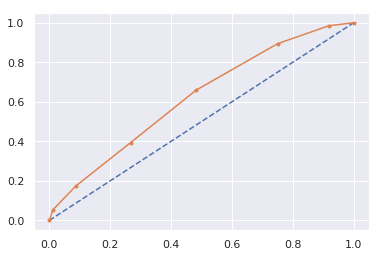

In [43]:
knn_cv = KNeighborsClassifier(n_neighbors=6)
knn_cv.fit(X_train, y_train)
# predict probabilities
probs = knn_cv.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

# 6.2 SVC

In [68]:
tic = time.clock()
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, features_pca, status_gene_cli, cv=5)
toc = time.clock()
exctime = toc - tic
print(exctime)
#print each cv score (accuracy) and average them
print(scores)
print('scores mean:{}'.format(np.mean(scores)))

/Users/zhuonijie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


9.909706000000028
[0.60855263 0.61842105 0.50825083 0.55115512 0.57284768]
scores mean:0.5718454613847582


/Users/zhuonijie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


In [78]:
print(exctime/5)

1.9819412000000056


In [69]:
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, features_pca, status_gene_cli, cv=5, scoring='f1_macro')
#print each cv score (accuracy) and average them
print(scores)
print('scores mean:{}'.format(np.mean(scores)))

[0.60820924 0.59153037 0.50039285 0.53698876 0.56990031]
scores mean:0.5614043065007391


# Random Forest

In [50]:
rf = RandomForestClassifier(random_state = 42)
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [51]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [52]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 2, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(features_pca, status_gene_cli)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    5.7s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   16.7s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=2, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [53]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': False}

In [56]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=90, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [57]:
tic = time.clock()
best_random = rf_random.best_estimator_
scores = cross_val_score(best_random, features_pca, status_gene_cli, cv=5)
toc = time.clock()
exctime = toc - tic
print(exctime)
print(exctime/5)
#print each cv score (accuracy) and average them
print(scores)
print('scores mean:{}'.format(np.mean(scores)))

/Users/zhuonijie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


79.78766299999998
15.957532599999997
[0.56907895 0.57236842 0.56105611 0.57755776 0.57284768]
scores mean:0.5705817823852792


/Users/zhuonijie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


In [58]:
best_random = rf_random.best_estimator_
scores = cross_val_score(best_random, features_pca, status_gene_cli, cv=5, scoring='f1_macro')

#print each cv score (accuracy) and average them
print(scores)
print('scores mean:{}'.format(np.mean(scores)))

[0.41195672 0.40167682 0.44204984 0.45267502 0.48577201]
scores mean:0.43882608023291303


AUC: 0.642


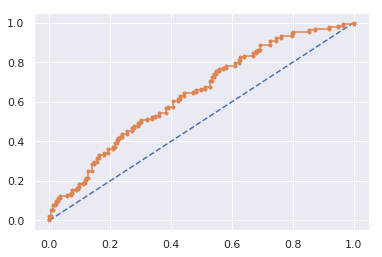

In [59]:
best_random.fit(X_train, y_train)
# predict probabilities
probs = best_random.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

# Gradient Boosting

In [40]:
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator = GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

KeyboardInterrupt: 

In [ ]:
p_test2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01,n_estimators=1500, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

In [38]:
model1 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
tic = time.clock()
model1.fit(X_train,y_train)
toc = time.clock()
exctime = toc - tic
print(exctime)
predictors=list(X_train)
#feat_imp = pd.Series(model1.feature_importances_, predictors).sort_values(ascending=False)
#feat_imp.plot(kind='bar', title='Importance of Features')
#plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(model1.score(X_test, y_test)))
pred=model1.predict(X_test)
print(classification_report(y_test, pred))

/Users/zhuonijie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


7.921160999999984
Accuracy of the GBM on test set: 0.612
              precision    recall  f1-score   support

           0       0.62      0.84      0.71       172
           1       0.60      0.32      0.42       132

   micro avg       0.61      0.61      0.61       304
   macro avg       0.61      0.58      0.56       304
weighted avg       0.61      0.61      0.58       304



/Users/zhuonijie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


AUC: 0.637


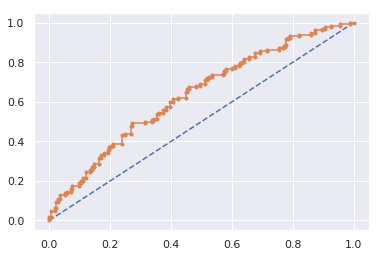

In [42]:
# predict probabilities
probs = model1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()